In [1]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
import numpy as np
from src.gameSimulation.GameUr import GameUr, Player, Dice, GameSettings
from src.helpers import labelLine
import gameBoardDisplay as gbd

from scipy import stats


%config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.collections as collections
import matplotlib.patches as mpatches

from matplotlib import patheffects


mplstyle.use('fast')
mplstyle.use('default')
mpl.rcParams['figure.figsize'] = [10, 20]

colors = ["lightgreen", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)


In [2]:
gs0 = GameSettings([], None, 4, 8, 2, [8], [4, 8, 14])

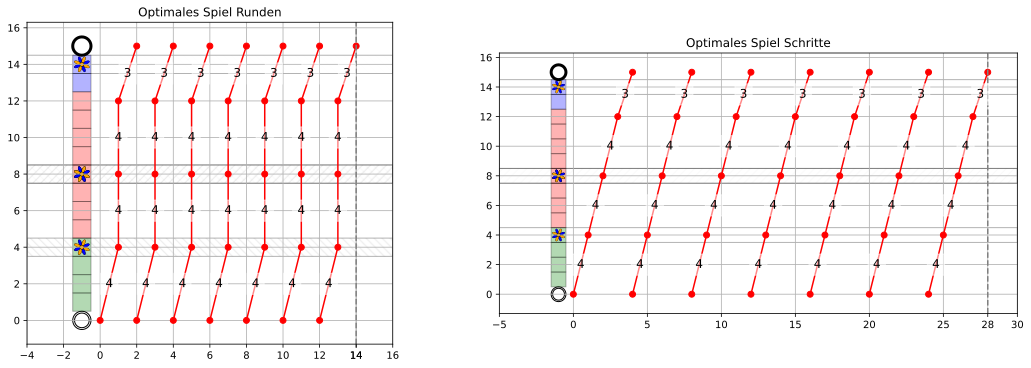

In [3]:

# xy = np.array((-2.,   7.5)) + (.5, .5)
xy = np.array((0,0))
offset = np.array((.1, .1))

fco = "orange"
fcb = "blue"
fig, ax = plt.subplot_mosaic([["p0","p1"]], figsize=[15, 5],constrained_layout=True)
gbd.makeGameboardDisplay(ax["p0"], *list(gs0.getFieldsSettings().values()), xoff=1.5)
gbd.makeGameboardDisplay(ax["p1"], *list(gs0.getFieldsSettings().values()), xoff=1.5,)

# ax.add_patch(rect)

ax["p0"].set_ybound(7.5, 8.5)
ax["p0"].set_xlim(7.5, 18.5)
ax["p0"].axis("equal")
# ax["p0"].axis("off")


paths = [
    ((0,1,1,1,2),(0,4,8,12,15)),
    ((0,1,1,1,2),(0,4,8,11,15)),
    ((0,1,1,1,2,2),(0,4,8,12,13,15)),
    ((0,1,1,1,2,2),(0,4,8,11,13,15)),
    ((0,1,1,1,2,2),(0,4,8,10,13,15)),
    ((0,1,1,1,2,2),(0,4,8,9,13,15)),
    ]
paths = [((0,1,1,1,2),(0,4,8,12,15))]*7
offset = 0
for i,path in enumerate(paths):
    x0 = [(x_+i*2) for x_ in path[0]]
    x1 = [x+sum([sum(p[0])-1 for p in paths[:i]]) for x in range(len(path[0]))]
    y= path[1]
    ax["p0"].plot(x0,y,marker="o", color="red")
    ax["p1"].plot(x1,y,marker="o", color="red")


# ax.grid(True, alpha=0.5)

ax["p0"].set_title("Optimales Spiel Runden")
ax["p1"].set_title("Optimales Spiel Schritte")
ax["p0"].set_xticks(list(ax["p0"].get_xticks())+[14])
ax["p1"].set_xticks(list(ax["p1"].get_xticks())+[28])


for a_n in ax:
    ax[a_n].grid()
    ax[a_n].set_aspect("equal","box")
    lines = ax[a_n].get_lines()
    for line in lines:
        labelLine(line, color="black",backgroundcolor="#ffffff88",size=12)
ax["p0"].axvline(14, ls="--",color="gray")
ax["p1"].axvline(28, ls="--",color="gray")